In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Initial Normalization
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 6ms/step - loss: 1.6911 - accuracy: 0.4565 - val_loss: 1.1279 - val_accuracy: 0.6074
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8904 - accuracy: 0.6881 - val_loss: 1.2694 - val_accuracy: 0.6152
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7059 - accuracy: 0.7569 - val_loss: 0.7701 - val_accuracy: 0.7349
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5701 - accuracy: 0.8025 - val_loss: 0.6832 - val_accuracy: 0.7799
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4741 - accuracy: 0.8367 - val_loss: 0.6029 - val_accuracy: 0.8044
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4096 - accuracy: 0.8590 - val_loss: 0.6051 - val_accuracy: 0.8087
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3400 - accuracy: 0.8815 - val_loss: 0.5857 - val_accuracy

In [8]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5501 - accuracy: 0.8250 - val_loss: 0.6229 - val_accuracy: 0.8075
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4370 - accuracy: 0.8575 - val_loss: 0.4936 - val_accuracy: 0.8387
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.4071 - accuracy: 0.8645 - val_loss: 0.4625 - val_accuracy: 0.8514
Epoch 4/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3880 - accuracy: 0.8710 - val_loss: 0.4375 - val_accuracy: 0.8597
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3724 - accuracy: 0.8764 - val_loss: 0.4699 - val_accuracy: 0.8496
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3588 - accuracy: 0.8794 - val_loss: 0.5403 - val_accuracy: 0.8279
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3379 - accuracy: 0.8861 - val_loss: 0.4388 -

**Observation:**

We are getting a lower training accuracy but a higher Validation accuracy. Hence, there is lesser Overfitting. Therefore, the model has improved.

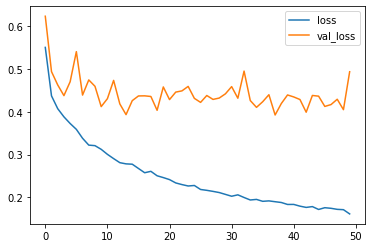

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:**

A much better learning curve than before. 

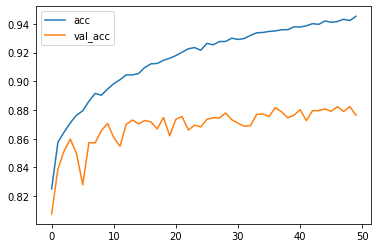

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[872   7  34  10   8   2  15   5  33  14]
 [  6 942   2   1   1   0   8   1   3  36]
 [ 26   0 845  25  27  19  46   4   2   6]
 [ 10   4  51 720  36  68  81  14   7   9]
 [  3   2  42  22 876  14  28  11   2   0]
 [  5   1  47  85  26 780  36  11   5   4]
 [  3   1  14   9   8   4 957   2   1   1]
 [  6   0  17  22  32  17  11 887   2   6]
 [ 22   7   7   3   1   2   5   1 939  13]
 [  9  25   4   2   1   1   4   0   8 946]]


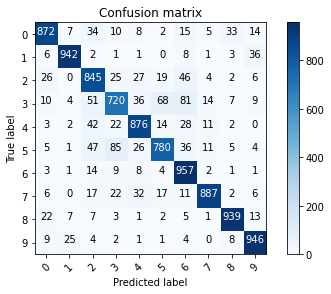

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:** 
Much lesser misclassifications as promised before.

In [12]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

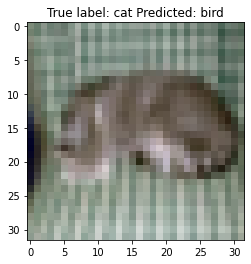

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

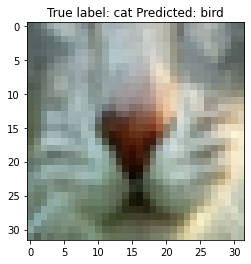

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

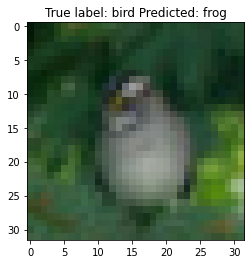

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

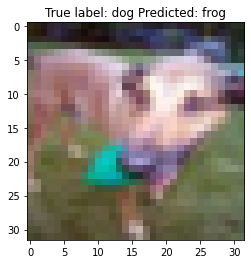

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [17]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 